In [36]:
from matplotlib import pyplot as plt
import seaborn as sb
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import FeatureAgglomeration


%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [6]:
d2 = pd.read_pickle('d2.pkl')
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Columns: 159 entries, town to developer_rate
dtypes: float64(152), int64(2), object(5)
memory usage: 706.2+ KB


In [8]:
X = d2.iloc[:,5:].values
X = preprocessing.scale(X)

In [11]:
FA = FeatureAgglomeration(n_clusters=20, affinity='euclidean', 
                          connectivity=None, compute_full_tree='auto', linkage='ward')

In [12]:
f = FA.fit_transform(X,)

In [19]:
for i in zip(FA.labels_,d2.columns[5:]):
    print(i)

(10, 'p_in_lab')
(3, 'p_unemployed')
(10, 'p_fem_labforce')
(10, 'p_fem_employed')
(7, 'p_ch6_paremp')
(12, 'p_com_car')
(2, 'p_com_carpool')
(16, 'p_com_transit')
(2, 'p_com_walk')
(2, 'p_com_other')
(0, 'p_com_home')
(8, 'mean_com_time')
(17, 'p_occ_bus')
(2, 'p_occ_serv')
(7, 'p_occ_sales')
(3, 'p_occ_const')
(3, 'p_occ_trans')
(6, 'p_ind_agri')
(3, 'p_ind_const')
(1, 'p_ind_manu')
(4, 'p_ind_whsl')
(7, 'p_ind_retl')
(3, 'p_ind_warehs')
(8, 'p_ind_info')
(17, 'p_ind_fire')
(5, 'p_ind_prof')
(7, 'p_ind_edu')
(2, 'p_ind_arts')
(7, 'p_ind_othserv')
(0, 'p_ind_pubadmin')
(1, 'p_class_wage')
(0, 'p_class_govt')
(8, 'p_class_self')
(1, 'p_class_unpaid')
(2, 'p_less10')
(2, 'p_10to15')
(18, 'p_15to25')
(18, 'p_25to35')
(3, 'p_35to50')
(3, 'p_50to75')
(3, 'p_75to100')
(14, 'p_100to150')
(14, 'p_150to200')
(17, 'p_over200')
(17, 'hh_inc_med')
(17, 'hh_inc_mean')
(2, 'p_peop_pov')
(14, 'p_1hu_bldg_det')
(1, 'p_1hu_bldg_att')
(16, 'p_20hu_bldg')
(6, 'p_hu_mobile')
(1, 'p_hu_gt_2010')
(7, 'p_hu

In [22]:
l = list(zip(FA.labels_,d2.columns[5:]))
l.sort(key=lambda tup: tup[0]) 
l

[(0, 'p_com_home'),
 (0, 'p_ind_pubadmin'),
 (0, 'p_class_govt'),
 (0, 'p_age65to74'),
 (0, 'p_age75to84'),
 (0, 'p_ageover85'),
 (0, 'p_civvet'),
 (1, 'p_ind_manu'),
 (1, 'p_class_wage'),
 (1, 'p_class_unpaid'),
 (1, 'p_1hu_bldg_att'),
 (1, 'p_hu_gt_2010'),
 (1, 'p_as_viet'),
 (1, 'fert_age20_34'),
 (1, 'fert_age35_50'),
 (1, 'CYMunicipalLibraryRate'),
 (1, 'CYCountyRate'),
 (1, 'num_badge'),
 (1, 'num_train_stat'),
 (2, 'p_com_carpool'),
 (2, 'p_com_walk'),
 (2, 'p_com_other'),
 (2, 'p_occ_serv'),
 (2, 'p_ind_arts'),
 (2, 'p_less10'),
 (2, 'p_10to15'),
 (2, 'p_peop_pov'),
 (2, 'p_hu_1room'),
 (2, 'p_hu_nocar'),
 (2, 'p_ageless5'),
 (2, 'p_age20to24'),
 (2, 'p_age25to34'),
 (2, 'p_black'),
 (2, 'p_2_races'),
 (2, 'p_latino'),
 (2, 'p_mexican'),
 (2, 'p_puerto_rico'),
 (2, 'p_other_lat'),
 (2, 'p_malehh'),
 (2, 'p_femhh'),
 (2, 'p_diffhousUS'),
 (3, 'p_unemployed'),
 (3, 'p_occ_const'),
 (3, 'p_occ_trans'),
 (3, 'p_ind_const'),
 (3, 'p_ind_warehs'),
 (3, 'p_35to50'),
 (3, 'p_50to75'),


In [35]:
df = pd.DataFrame(X.T)
df['labs'] = FA.labels_
df.set_index('labs',inplace=True)
df.sort_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 19
Columns: 565 entries, 0 to 564
dtypes: float64(565)
memory usage: 681.0 KB


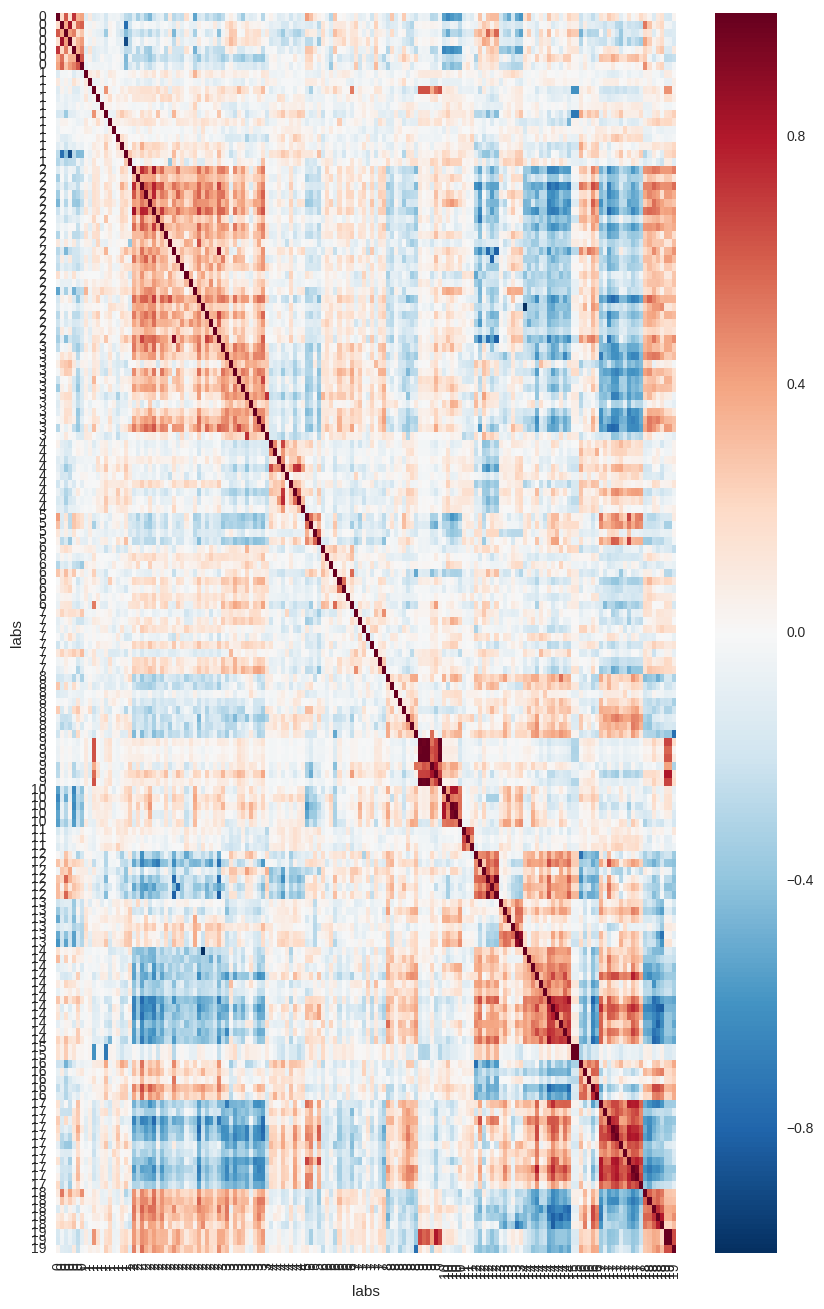

In [43]:
plt.figure(figsize=(10,16))
sb.heatmap(df.T.corr())

In [45]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_samples, silhouette_score,calinski_harabaz_score

In [54]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 19
Columns: 565 entries, 0 to 564
dtypes: float64(565)
memory usage: 681.0 KB


,0,1,2,3,4,5,6,7,8,9,...,555,556,557,558,559,560,561,562,563,564
labs,,,,,,,,,,,,,,,,,,,,,
0,0.569188,-0.429182,1.428251,-0.104131,0.569188,-0.313092,-0.498836,-1.009630,-0.754233,-0.313092,...,-0.452400,-0.359528,-0.522054,0.058394,-0.731015,-0.127349,-0.545271,-0.986412,-0.197003,2.542710
0,0.189950,-0.207906,0.189950,-0.008978,-0.466513,0.627592,0.070593,-0.148228,1.204483,0.528128,...,0.269521,0.269521,-0.327263,-0.426727,0.130271,0.150164,0.150164,-0.705226,0.727056,-0.705226
0,0.531958,-0.525463,0.687461,-1.302979,1.620480,-0.867570,-0.152255,0.158751,1.122870,0.780763,...,-0.432161,0.438656,0.531958,-0.494362,0.531958,0.252053,0.252053,-1.178576,0.158751,1.962587
0,0.088970,-0.477840,-0.056781,-0.056781,0.445250,1.757010,0.056581,-0.364478,1.886567,0.250916,...,0.250916,0.137554,-0.429256,-0.072976,0.655780,0.396667,0.736753,-0.558813,1.497897,-0.332089
0,-0.054640,-0.157318,0.766781,-0.876062,0.184941,-0.807610,-0.773384,-0.704932,-0.670706,-0.328447,...,-0.157318,-0.636480,0.424522,-0.773384,-0.294222,-0.123092,0.424522,-1.252547,0.253393,1.793558


In [55]:
f.shape

(565, 20)

In [66]:
clusterer = AffinityPropagation(damping=0.93, max_iter=200, convergence_iter=15, copy=True, 
                                preference=None, affinity='euclidean', verbose=True)
cluster_labels = clusterer.fit_predict(f)
    
cluster_centers = clusterer.cluster_centers_ 
indices = clusterer.cluster_centers_indices_
len(indices)

k = list(zip(d2['town'],cluster_labels))

silhouette_avg = silhouette_score(X, cluster_labels, metric='correlation')
ch_score = calinski_harabaz_score(X, cluster_labels)
print("For n_clusters =", len(indices),
          "The average silhouette_score is :", silhouette_avg,
         "\nThe Calinski Harabasz score is :", ch_score)

k

Converged after 15 iterations.
For n_clusters = 5 The average silhouette_score is : 0.028324436866 
The Calinski Harabasz score is : 34.8255559777


[('Absecon city', 2),
 ('Atlantic City city', 2),
 ('Brigantine city', 2),
 ('Buena borough', 2),
 ('Buena Vista township', 2),
 ('Corbin City city', 2),
 ('Egg Harbor township', 2),
 ('Egg Harbor City city', 2),
 ('Estell Manor city', 0),
 ('Folsom borough', 2),
 ('Galloway township', 2),
 ('Hamilton township', 2),
 ('Hammonton town', 2),
 ('Linwood city', 0),
 ('Longport borough', 2),
 ('Margate City city', 2),
 ('Mullica township', 2),
 ('Northfield city', 2),
 ('Pleasantville city', 2),
 ('Port Republic city', 0),
 ('Somers Point city', 2),
 ('Ventnor City city', 2),
 ('Weymouth township', 2),
 ('Allendale borough', 0),
 ('Alpine borough', 0),
 ('Bergenfield borough', 2),
 ('Bogota borough', 2),
 ('Carlstadt borough', 2),
 ('Cliffside Park borough', 2),
 ('Closter borough', 0),
 ('Cresskill borough', 0),
 ('Demarest borough', 0),
 ('Dumont borough', 2),
 ('East Rutherford borough', 2),
 ('Edgewater borough', 2),
 ('Elmwood Park borough', 2),
 ('Emerson borough', 0),
 ('Englewood ci

In [68]:
print(f.shape)
type(f)

(565, 20)


numpy.ndarray

In [71]:
d2.iloc[:,:5].join(pd.DataFrame(f)).to_pickle('f.pkl')